In [1]:
# Developer: Erik Garcia (Erik172)

import sys
import os

# Obtén la ruta del directorio padre (el directorio raíz de tu proyecto)
parent_dir = os.path.abspath(os.path.join(os.path.dirname(__name__), '../..'))
sys.path.append(parent_dir)

from torombolo.perceptron import Perceptron

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
sns.set_style('darkgrid')
plt.rcParams['figure.dpi'] = 80
warnings.filterwarnings('ignore')

In [4]:
iris = sns.load_dataset('iris')
iris = iris[(iris['species'] == 'setosa') | (iris['species'] == 'versicolor')]
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
X = iris.iloc[:, [0, 2]].values
y = iris.iloc[:, 4].values
y = np.where(y == 'setosa', 0, 1)

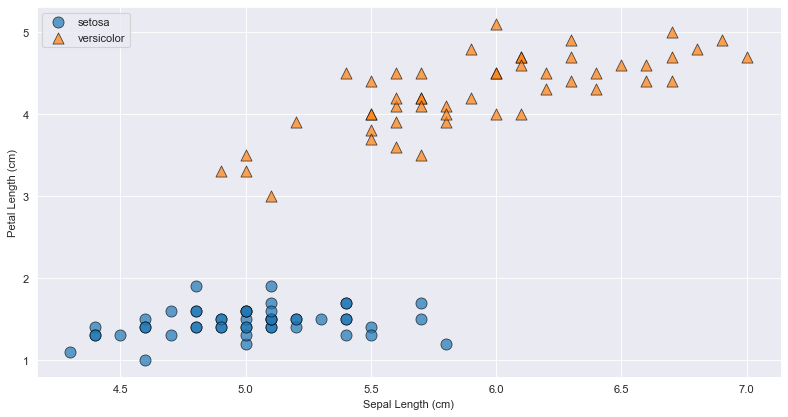

In [6]:
plt.figure(figsize=(12, 6))

sns.scatterplot(
    x=X[y == 0, 0],
    y=X[y == 0, 1],
    label='setosa',
    marker='o',
    s=100,
    alpha=.7,
    edgecolor='k',
    linewidth=.7
)

sns.scatterplot(
    x=X[y == 1, 0],
    y=X[y == 1, 1],
    label='versicolor',
    marker='^',
    s=100,
    alpha=.7,
    edgecolor='k',
    linewidth=.7
)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.show()

In [7]:
# Calculate the size of the test set
test_size = int(len(y) * 0.3)

# Set the random seed for reproducibility
np.random.seed(1)

# Generate a permutation of indices for the data
indices = np.random.permutation(len(y))

# Split the indices into training and test indices
training_indices, test_indices = indices[test_size:], indices[:test_size]

# Use these indices to create the training and test sets
X_train, X_test = X[training_indices], X[test_indices]
y_train, y_test = y[training_indices], y[test_indices]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70, 2), (30, 2), (70,), (30,))

In [8]:
perceptron = Perceptron(learning_rate=0.01, n_iter=1000)
perceptron.fit(X_train, y_train)

In [9]:
y_pred = perceptron.predict(X_test)

In [10]:
print('Accuracy: %.2f' % perceptron.accuracy(X_test, y_test, metric='f1'))

Accuracy: 1.00


In [11]:
n_classes = len(np.unique(y_test))

# Crea una matriz de ceros con dimensiones (n_classes, n_classes)
cm = np.zeros((n_classes, n_classes))

# Itera sobre las predicciones y las etiquetas verdaderas
for true_label, predicted_label in zip(y_test, y_pred):
    cm[true_label][predicted_label] += 1

cm

array([[14.,  0.],
       [ 0., 16.]])

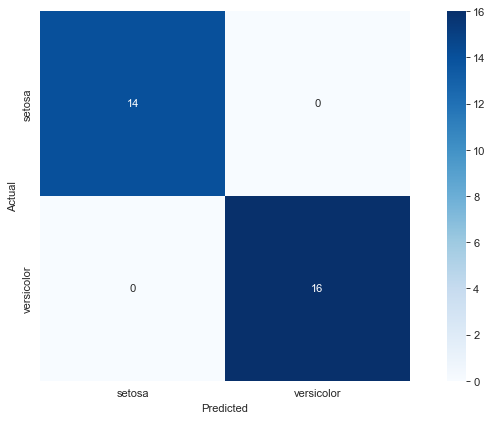

In [12]:
# plot the confusion matrix
plt.figure(figsize=(12, 6))

sns.heatmap(
    cm,
    annot=True,
    cmap='Blues',
    square=True,
    xticklabels=['setosa', 'versicolor'],
    yticklabels=['setosa', 'versicolor']
)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [13]:
perceptron.w_, perceptron.b_

(array([-0.24465427,  0.22196612]), array([0.71240359]))

In [14]:
decision_line_slope = -perceptron.w_[0] / perceptron.w_[1]
decision_line_intercept = -perceptron.b_ / perceptron.w_[1]

# Crear puntos para trazar la línea de decisión
x_values = np.linspace(4.2, 7.3, 100)
y_values = decision_line_slope * x_values + decision_line_intercept

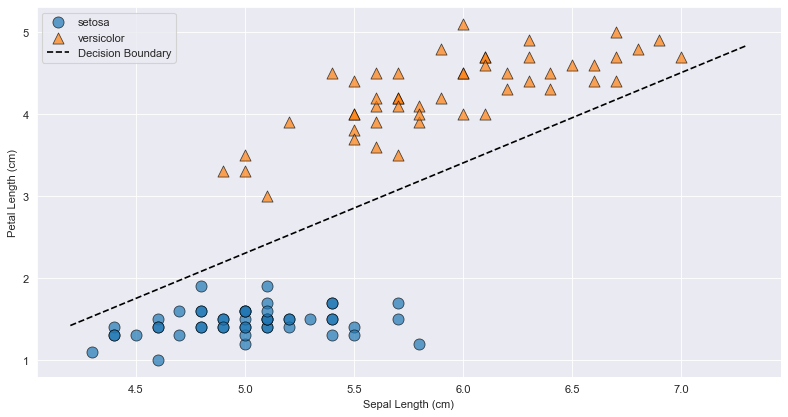

In [20]:
plt.figure(figsize=(12, 6))

sns.scatterplot(
    x=X[y == 0, 0],
    y=X[y == 0, 1],
    label='setosa',
    marker='o',
    s=100,
    alpha=.7,
    edgecolor='k',
    linewidth=.7
)

sns.scatterplot(
    x=X[y == 1, 0],
    y=X[y == 1, 1],
    label='versicolor',
    marker='^',
    s=100,
    alpha=.7,
    edgecolor='k',
    linewidth=.7
)

plt.plot(
    x_values, y_values, 
    label='Decision Boundary',
    c='k',
    linestyle='--',
)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.show()

In [16]:
perceptron.predict(X_test[5]), y_test[5]

(array([0]), 0)